Import the module "epanet" from the package "epyt"

In [11]:
from epyt import epanet

Load the L-Town epanet input file and create the object G

In [12]:
G = epanet('L-TOWN.inp')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File L-TOWN.inp loaded successfully.



In [13]:
dir(G)  # Lists all available functions and properties in G

['BinTempfile',
 'CMDCODE',
 'ControlLevelValues',
 'ControlLinkIndex',
 'ControlNodeIndex',
 'ControlRulesCount',
 'ControlSettings',
 'ControlTypes',
 'ControlTypesIndex',
 'Controls',
 'CurveCount',
 'CurveIndex',
 'CurvesInfo',
 'DEMANDMODEL',
 'InputFile',
 'Iterations',
 'LOGOP',
 'LibEPANET',
 'LibEPANETpath',
 'LinkBulkReactionCoeff',
 'LinkCount',
 'LinkDiameter',
 'LinkFlowUnits',
 'LinkIndex',
 'LinkInitialSetting',
 'LinkInitialStatus',
 'LinkLength',
 'LinkMinorLossCoeff',
 'LinkNameID',
 'LinkPipeCount',
 'LinkPipeIndex',
 'LinkPipeNameID',
 'LinkPumpCount',
 'LinkPumpHeadCurveIndex',
 'LinkPumpIndex',
 'LinkPumpNameID',
 'LinkPumpPatternIndex',
 'LinkPumpPatternNameID',
 'LinkPumpPower',
 'LinkPumpType',
 'LinkPumpTypeCode',
 'LinkRoughnessCoeff',
 'LinkType',
 'LinkTypeIndex',
 'LinkValveCount',
 'LinkValveIndex',
 'LinkValveNameID',
 'LinkWallReactionCoeff',
 'NodeBaseDemands',
 'NodeCoordinates',
 'NodeCount',
 'NodeDemandCategoriesNumber',
 'NodeDemandPatternIndex',


In [14]:
help(G.getNodeElevations)  # Retrieve some examples for the function getNodeElevations

Help on method getNodeElevations in module epyt.epanet:

getNodeElevations(*argv) method of epyt.epanet.epanet instance
    Retrieves the value of all node elevations.
    Example:
    
    >>> d.getNodeElevations()             # Retrieves the value of all node elevations
    >>> d.getNodeElevations(1)            # Retrieves the value of the first node elevation
    >>> d.getNodeElevations([4, 5, 6])    # Retrieves the value of the 5th to 7th node elevations
    
    See also setNodeElevations, getNodesInfo, getNodeNameID,
    getNodeType, getNodeEmitterCoeff, getNodeInitialQuality.



In [15]:
diameters = G.getLinkDiameter()  # retrieve Link diameters
elevations = G.getNodeElevations()  # retrieve Node elevations

G.getLinkDiameter([2, 10])  # Link diameter for link indices 2 & 10
G.setLinkDiameter(10, 90)  # Change the link with index 10 diameter to 90mm
G.getLinkDiameter([2, 10])  # Retrieve the diameter of link index 10

array([150.,  90.])

Solve hydraulics and quality dynamics

In [16]:
# H = G.getComputedHydraulicTimeSeries()  # Solve hydraulics in library
# Q = G.getComputedQualityTimeSeries()  # Solve quality dynamics in library

R = G.getComputedTimeSeries_ENepanet()  # Solve all dynamics in library, create a binary file to store the computed
# values

Plot Network

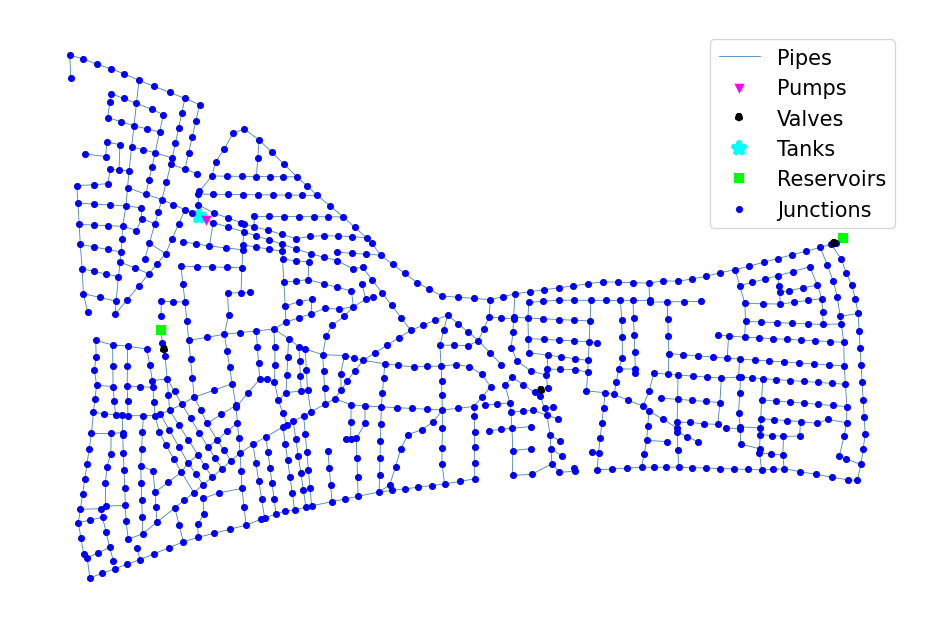

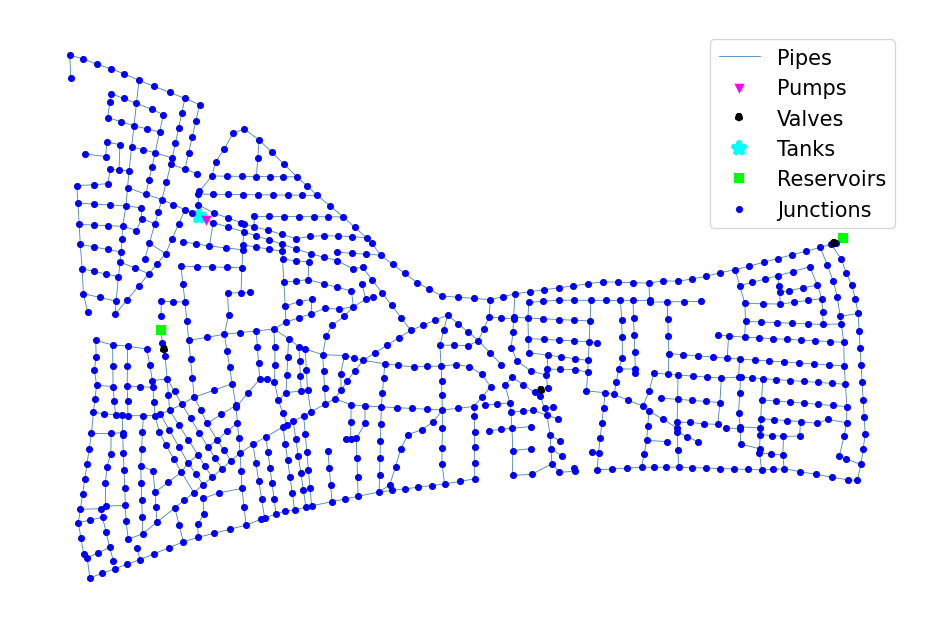

In [17]:
G.plot()

Plot link flows and quality

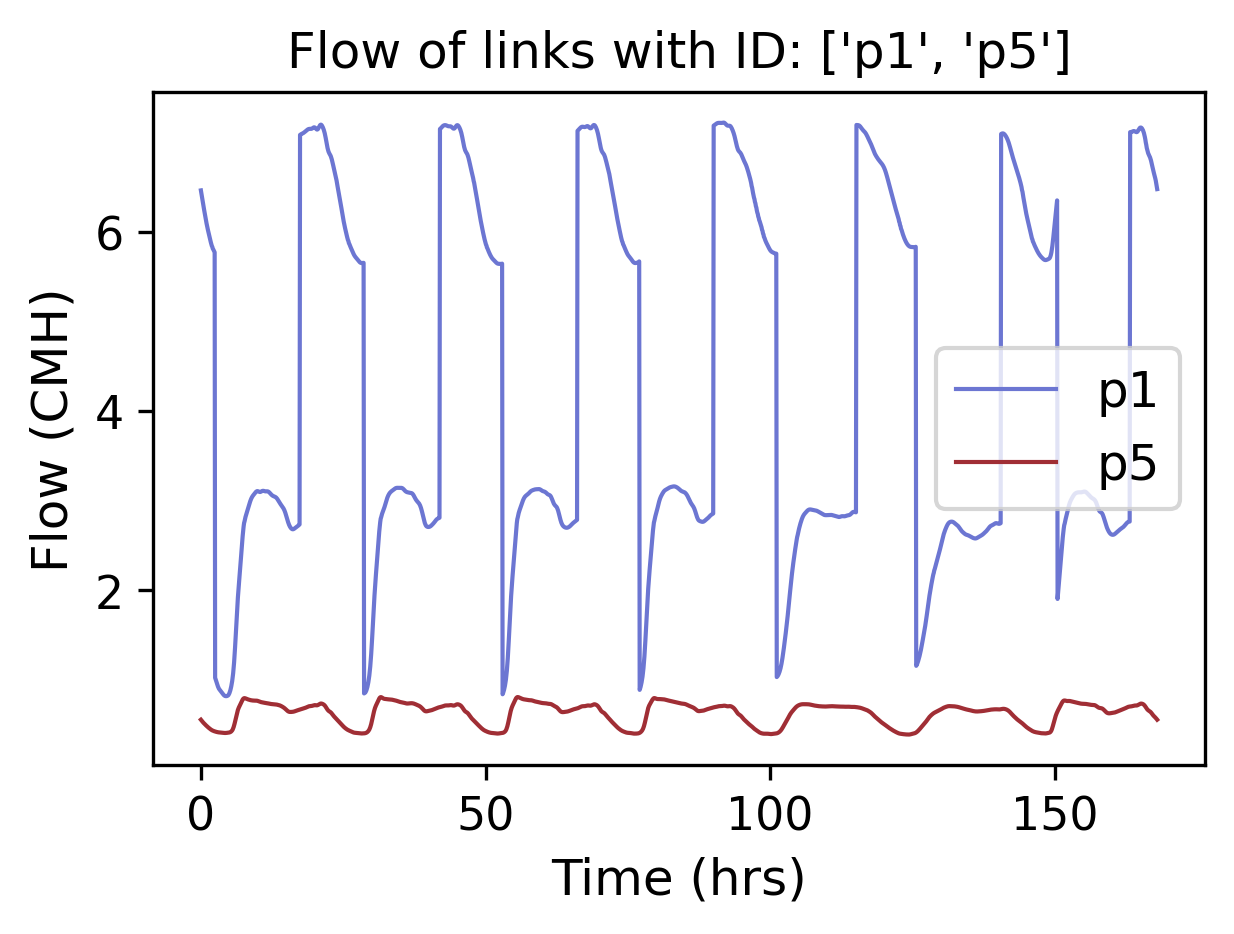

In [18]:
hrs_time = R.Time / 3600  # transform seconds into hours
link_indices = [1, 5]  # select indices to plot
link_names = G.getLinkNameID(link_indices)  # get the ID of the link indices

G.plot_ts(X=hrs_time, Y=R.Flow[:, link_indices], title=f'Flow of links with ID: {link_names}', figure_size=[4, 3],
          legend_location='best', xlabel='Time (hrs)', ylabel=f'Flow ({G.units.LinkFlowUnits})', marker=None,
          labels=link_names, save_fig=True, filename='figures/paper_flows')